In [ ]:
!pip install bs4
!pip install openpyxl

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import clear_output

In [ ]:
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')

In [ ]:
y_train = y_train['category']
y_test = y_test['category']

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
def create_cloud_graph(corpus):
    wordcloud = WordCloud(
        width=1600, height=800, max_words=200, background_color='white', collocations=False
    ).generate(' '.join(corpus))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

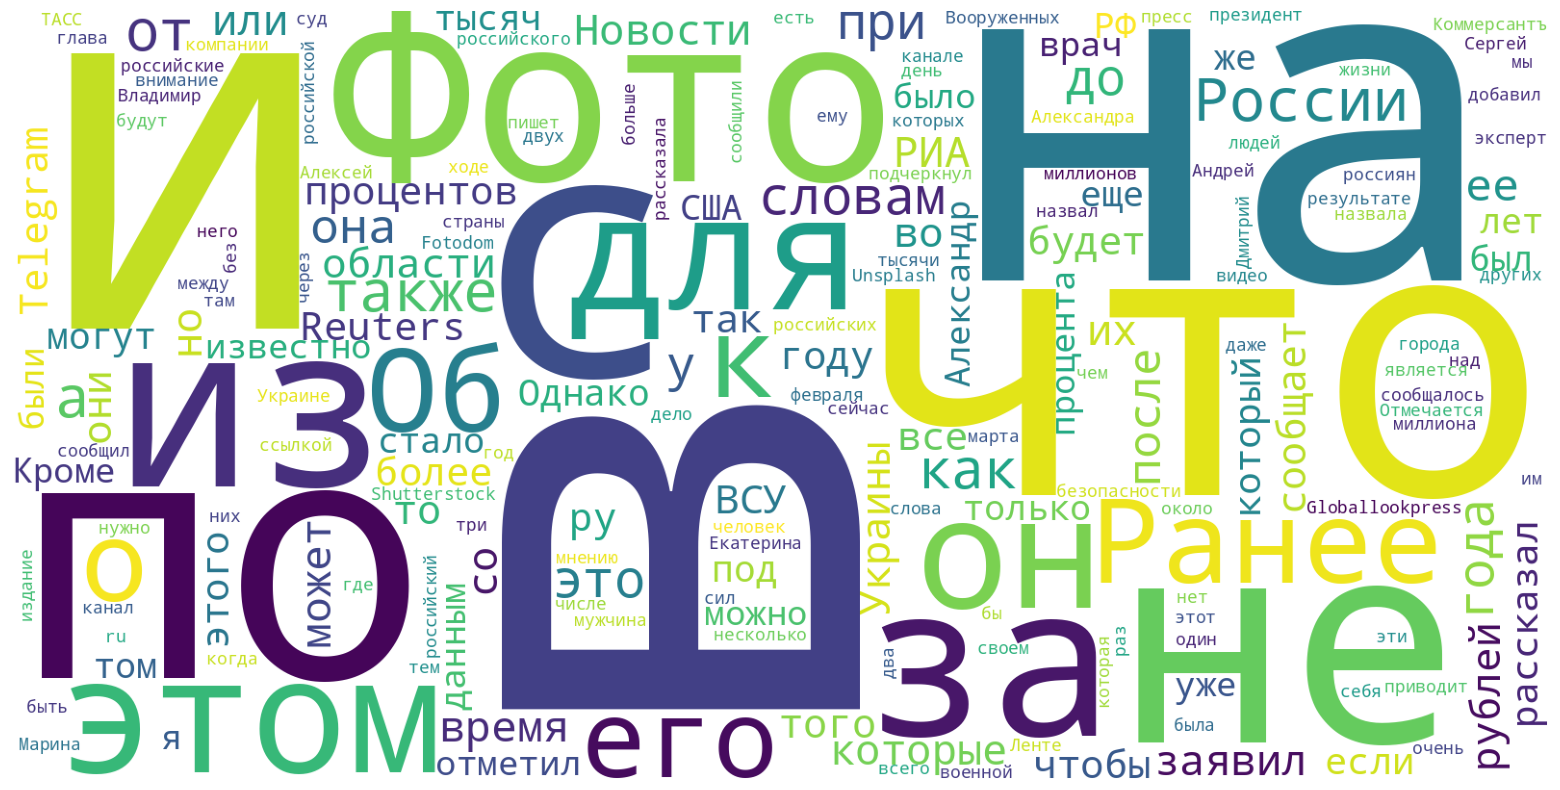

In [ ]:
create_cloud_graph(X_train['text'])

Видим, что много слов это местоимения, предлоги и так далее, их уберем позже, когда будем убирать стоп слова

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(min_df=4, max_df=0.95)
bow_vectorizer.fit(X_train['text']);

In [ ]:
bow_train = bow_vectorizer.transform(X_train['text'])
bow_test = bow_vectorizer.transform(X_test['text'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
def LR(train, test, y_tr, y_test):
    lr = LogisticRegression(max_iter=500)
    lr.fit(train, y_tr)

    train_pred = lr.predict(train)
    test_pred = lr.predict(test)

    train_acc = accuracy_score(y_tr, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print('Train accuracy:', round(train_acc, 3))
    print('Test accuracy: ', round(test_acc, 3))

In [ ]:
LR(bow_train, bow_test, y_train, y_test)

Train accuracy: 1.0
Test accuracy:  0.924


Просто реализовали мешок слов, чтобы перевести текст в векторы чисел

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=4, max_df=0.95)
tfidf_vectorizer.fit(X_train['text']);
tfidf_train = tfidf_vectorizer.transform(X_train['text'])
tfidf_test = tfidf_vectorizer.transform(X_test['text'])

In [ ]:
LR(tfidf_train, tfidf_test, y_train, y_test)

Train accuracy: 0.97
Test accuracy:  0.917


Отрезали слишком редкие слова и слишком частые, которые встречаются чаще 95% случаев

In [ ]:
from sklearn.manifold import TSNE

tsne_vectors = TSNE(
    n_components=2, learning_rate='auto', init='random', perplexity=30
).fit_transform(tfidf_train[-2000:])
tsne_vectors.shape

(2000, 2)

In [ ]:
colors = y_train[-2000:]
classes = ['Россия', 'Экономика', 'Силовые структуры', 'Бывший СССР', 'Спорт', 'Забота о себе', 'Строительство', 'Туризм', 'Наука и техника']

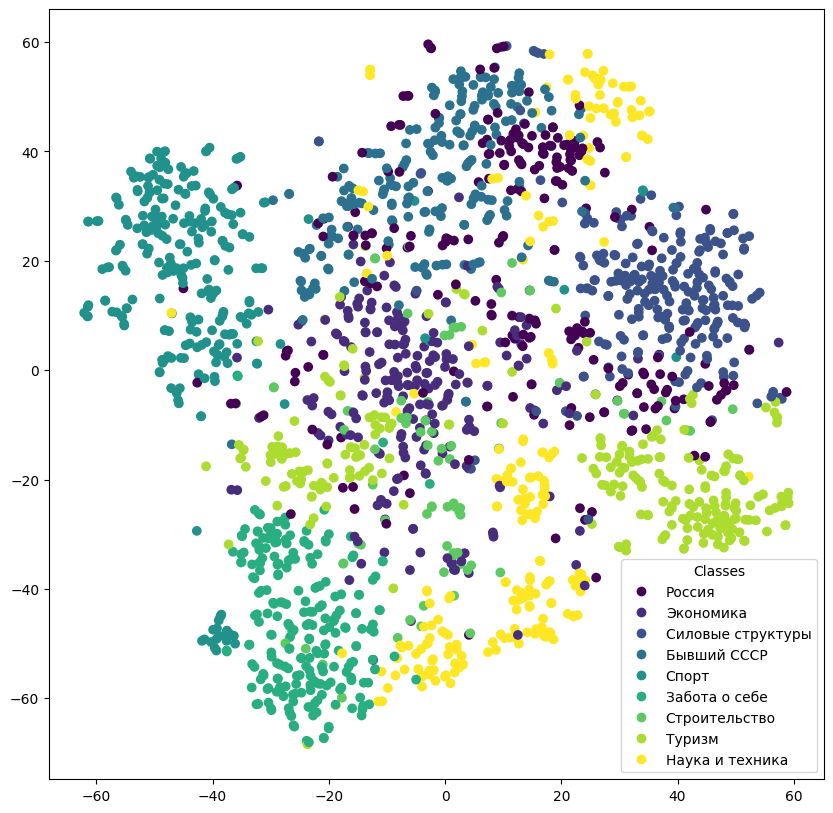

In [ ]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=colors)

plt.legend(scatter.legend_elements()[0], classes, title="Classes")

Видим, что более менее скучкованы темы спорт, туризм, силовые структуры, очень разбросана нука и техника

In [ ]:
import re
from string import punctuation
from nltk.tokenize import wordpunct_tokenize
def tokenize(text):
    reg = re.compile(r'\w+')
    return reg.findall(text)

In [ ]:
data_tok_train = [tokenize(t.lower()) for t in X_train['text']]
data_tok_test = [tokenize(t.lower()) for t in X_test['text']]

In [ ]:
print(data_tok_train[:2])

[['фото', 'мчс', 'россии', 'тасс', 'александра', 'качан', 'в', 'магадане', 'на', 'автомобильных', 'дорогах', 'образовались', 'пробки', 'из', 'за', 'выпавшего', 'снега', 'о', 'транспортном', 'коллапсе', 'из', 'за', 'непогоды', 'сообщает', 'пресс', 'служба', 'регионального', 'мчс', 'обильные', 'осадки', 'обусловлены', 'прохождением', 'циклона', 'сотрудники', 'мчс', 'работают', 'в', 'режиме', 'повышенной', 'готовности', 'пожарные', 'и', 'спасатели', 'оказывают', 'помощь', 'застрявшим', 'на', 'дорогах', 'автомобилистам', 'а', 'также', 'адресную', 'помощь', 'горожанам', 'при', 'необходимости', 'спасателям', 'приходится', 'буксировать', 'технику', 'из', 'снежных', 'заносов', 'в', 'сеть', 'попало', 'видео', 'на', 'котором', 'группа', 'сотрудников', 'мчс', 'выталкивает', 'с', 'заснеженной', 'дороги', 'автобус', 'ведомство', 'призывает', 'жителей', 'региона', 'воздержаться', 'от', 'поездок', 'за', 'пределы', 'населенных', 'пунктов', 'ранее', 'синоптики', 'призвали', 'московских', 'водителей', '

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
stop_words += ['фото', 'com', 'ru']
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(tokenized_texts):
    clear_texts = []
    for words in tokenized_texts:
        clear_texts.append([word for word in words if word not in stop_words])

    return clear_texts

In [ ]:
data_tok_train = remove_stopwords(data_tok_train)
data_tok_test = remove_stopwords(data_tok_test)

In [ ]:
print(X_train['text'].iloc[50])
print(data_tok_train[50])

Фото: Alexey Belkin / Globallookpress.com Алена Шаповалова За 10 лет компания СберСтрахование застраховала 17 миллионов человек. Всего у компании на данный момент порядка 10 миллионов действующих клиентов, рассказал старший вице-президент, руководитель блока «Управление благосостоянием» Сбербанка Руслан Вестеровский в рамках пресс-конференции, посвященной десятилетию компании СберСтрахование. В 2014 году компания начала с ипотечного страхования, а в 2020 году она получила лицензию на добровольное страхование имущества физических лиц. Всего за 10 лет клиенты оформили 25,2 млн договоров защиты жилья, из которых 66 процентов пришлось на полисы ипотечного страхования жилья и 34 процента на договоры добровольной защиты. По словам Руслана Вестеровского, сегодня компания лидирует в направлении страхования имущества физических лиц, занимая 35 процентов страхового рынка России. Так, примерно каждая четвертая ипотека застрахована в СберСтраховании. Начиная с 2021 года, в СберСтраховании начали с

Удалили стоп слова, привели все к нижнему регистру

In [ ]:
from nltk.stem import SnowballStemmer
from tqdm import tqdm
def stem_text(tokenized_texts):
    stemmed_data = []
    stemmer = SnowballStemmer(language="russian")

    for words in tqdm(tokenized_texts):
        stemmed_words = [stemmer.stem(word) for word in words]
        stemmed_data.append(stemmed_words)
    return stemmed_data

In [ ]:
stemmed_train = stem_text(data_tok_train)
stemmed_test = stem_text(data_tok_test)

100%|██████████| 6773/6773 [00:39<00:00, 173.11it/s]


In [ ]:
print(data_tok_train[50])
print(stemmed_train[50])

['alexey', 'belkin', 'globallookpress', 'алена', 'шаповалова', '10', 'лет', 'компания', 'сберстрахование', 'застраховала', '17', 'миллионов', 'человек', 'компании', 'данный', 'момент', 'порядка', '10', 'миллионов', 'действующих', 'клиентов', 'рассказал', 'старший', 'вице', 'президент', 'руководитель', 'блока', 'управление', 'благосостоянием', 'сбербанка', 'руслан', 'вестеровский', 'рамках', 'пресс', 'конференции', 'посвященной', 'десятилетию', 'компании', 'сберстрахование', '2014', 'году', 'компания', 'начала', 'ипотечного', 'страхования', '2020', 'году', 'получила', 'лицензию', 'добровольное', 'страхование', 'имущества', 'физических', 'лиц', '10', 'лет', 'клиенты', 'оформили', '25', '2', 'млн', 'договоров', 'защиты', 'жилья', 'которых', '66', 'процентов', 'пришлось', 'полисы', 'ипотечного', 'страхования', 'жилья', '34', 'процента', 'договоры', 'добровольной', 'защиты', 'словам', 'руслана', 'вестеровского', 'сегодня', 'компания', 'лидирует', 'направлении', 'страхования', 'имущества', '

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, min_df=4)
tfidf_vectorizer.fit(stemmed_train);
tfidf_stemmed_train = tfidf_vectorizer.transform(stemmed_train)
tfidf_stemmed_test = tfidf_vectorizer.transform(stemmed_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
LR(tfidf_stemmed_train, tfidf_stemmed_test, y_train, y_test)

Train accuracy: 0.965
Test accuracy:  0.918


In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 63.8 MB/s eta 0:00:00


In [ ]:
import pymorphy3

def lemmatize_text(tokenized_texts):
    lemmatized_data = []
    lemmatizer = pymorphy3.MorphAnalyzer()
    for i, words in enumerate(tqdm(tokenized_texts)):
        lemmatized_words = [lemmatizer.normal_forms(word)[0] for word in words]
        lemmatized_data.append(lemmatized_words)

    return lemmatized_data

In [ ]:
lemmatized_train = lemmatize_text(data_tok_train)
lemmatized_test = lemmatize_text(data_tok_test)

100%|██████████| 6773/6773 [01:33<00:00, 72.44it/s]


Нормализовали слова, lemmatizer.normal_forms(word)[0] берем нулевой элемент, поскольку для некоторых слов выдается несколько нормальных форм

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, min_df=4)
tfidf_vectorizer.fit(lemmatized_train);
tfidf_lemmatized_train = tfidf_vectorizer.transform(lemmatized_train)
tfidf_lemmatized_test = tfidf_vectorizer.transform(lemmatized_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
LR(tfidf_lemmatized_train, tfidf_lemmatized_test, y_train, y_test)

Train accuracy: 0.964
Test accuracy:  0.915


In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(tfidf_lemmatized_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
dataset = pd.read_csv('/content/test_news.csv')

In [ ]:
data = pd.read_csv('/content/all_data (1).csv')

In [ ]:
y = data['category']

In [ ]:
data = [tokenize(t.lower()) for t in data['text']]
data = remove_stopwords(data)


In [ ]:
lemmatized_data = lemmatize_text(data)

100%|██████████| 195132/195132 [45:14<00:00, 71.90it/s]


In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, min_df=4)
tfidf_vectorizer.fit(lemmatized_data);

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
dataset = [tokenize(t.lower()) for t in dataset['content']]
dataset = remove_stopwords(dataset)
lemmatized_dataset = lemmatize_text(dataset)
tfidf_lemmatized_dataset = tfidf_vectorizer.transform(lemmatized_dataset)
tfidf_lemmatized_data = tfidf_vectorizer.transform(lemmatized_data)

100%|██████████| 26275/26275 [09:54<00:00, 44.23it/s]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=239)
RF.fit(tfidf_lemmatized_data, y)


RandomForestClassifier(random_state=239)

In [ ]:
answer = pd.DataFrame(RF.predict(tfidf_lemmatized_dataset))
answer.to_csv("Random_Forest.csv")

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(tfidf_lemmatized_data, y)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = lr.predict(tfidf_lemmatized_dataset)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.to_csv('megadata.csv')

Выводы:
Обычная линейная регрессия проявила себя лучше всего, гораздо лучше, чем Random_forest (предсказания уже на каггле проверяла, потому что на моем датасете ОЧЕНЬОЧЕНЬ долго и больно это делать)
Скорее всего, если перебрать модели гридсерчем, то можно добиться и большего качества, но поскольку каждая итерация обучения очень долгая, то кросс-валидацию я не стала реализовывать.